In [313]:
#coding:utf-8
%reload_ext autoreload 
%autoreload 2
import os
import sys
project_basedir = '..'
sys.path.append(project_basedir)
from config import conf
import json
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

In [314]:
validate_dirs = os.listdir(conf.validate_dir)
validate_dirs = [i for i in validate_dirs if i != '_blank']
validate_dirs = sorted(validate_dirs)
validate_dirs = [os.path.join(conf.validate_dir,i) for i in validate_dirs]

In [315]:
def add_score(onedic,key,point):
    onedic.setdefault(key,0)
    onedic[key] += point
def cal_points(gameplays):
    point_dic = {}
    for onegame in gameplays:
        if onegame[-3:] != 'cbf':
            continue
        winner = onegame.split('_')[-1].split('.')[0]
        player1 = onegame.split('_')[-2].split('-')[0]
        player2 = onegame.split('_')[-2].split('-')[1]
        assert(winner in ['w','b','peace'])
        if winner == 'w':
            add_score(point_dic,player1,1)
            add_score(point_dic,player2,0)
        elif winner == 'b':
            add_score(point_dic,player1,0)
            add_score(point_dic,player2,1)
        elif winner == 'peace':
            add_score(point_dic,player1,0.5)
            add_score(point_dic,player2,0.5)
            add_score(point_dic,'peace',1)
        else:
            raise
    return point_dic

In [316]:
game_numbers = [0]
game_numbers_identity = [0]
elu_points = [0]
validate_games = [0]
win_rate = [0]
dates = ['start']
peace_rates = [0]
delta_elo = [0]
for one_dir in validate_dirs:
    one_date = one_dir.split('/')[-1]
    gameplays = os.listdir(one_dir)
    pointcdic = cal_points(gameplays)
    game_num = len(gameplays)
    
    game_numbers.append(game_numbers[-1] + len(os.listdir(os.path.join(conf.history_selfplay_dir,one_date))))
    game_numbers_identity.append(len(os.listdir(os.path.join(conf.history_selfplay_dir,one_date))))
    old_score = pointcdic['oldnet'] / game_num
    peace_rate = pointcdic.get('peace',0) / game_num
    elo = np.log10(1 / old_score - 1) * 400
    elu_points.append(elu_points[-1] + elo)
    validate_games.append(len(gameplays))
    win_rate.append(1 - old_score)
    dates.append(one_date)
    peace_rates.append(peace_rate)
    delta_elo.append(elo)

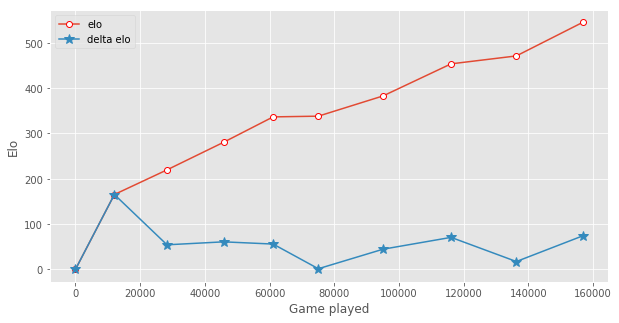

In [317]:
plt.figure(figsize=(10,5))
plt.plot(game_numbers,elu_points,marker='o',mec='r',mfc='w',label='elo')
plt.plot(game_numbers,delta_elo,marker='*',ms=10,label='delta elo')
plt.legend()
plt.xlabel("Game played")
plt.ylabel("Elo")

In [318]:
pd.DataFrame({
    'dates':dates,
    'game_numbers':game_numbers,
    'game_numbers_identity':game_numbers_identity,
    'elu_points':elu_points,
    'validate_games':validate_games,
    'win_rate':win_rate,
    'peace_rates':peace_rates,
    'delta_elo':delta_elo,
})

,dates,delta_elo,elu_points,game_numbers,game_numbers_identity,peace_rates,validate_games,win_rate
0,start,0.000000,0.000000,0,0,0.000000,0,0.000000
1,2018-07-17_21-59-58,165.330901,165.330901,12033,12033,0.182648,219,0.721461
2,2018-07-18_21-06-47,54.379517,219.710418,28296,16263,0.141553,219,0.577626
3,2018-07-19_21-13-26,60.901819,280.612237,45797,17501,0.187215,219,0.586758
4,2018-07-20_21-13-25,56.006357,336.618595,61100,15303,0.200913,219,0.579909
5,2018-07-21_21-13-25,1.586475,338.205070,75075,13975,0.255708,219,0.502283
6,2018-07-25_22-18-46,44.665434,382.870504,95084,20009,0.251142,219,0.563927
7,2018-07-27_09-28-20,70.767080,453.637584,116102,21018,0.333333,219,0.600457
8,2018-07-29_00-13-25,17.465800,471.103384,136273,20171,0.365297,219,0.525114
9,2018-07-30_16-13-25,74.079908,545.183293,156787,20514,0.360731,219,0.605023


In [319]:
!ls -l ../data/distributed/ | wc -l

2873
